In [1]:
#from iminuit import Minuit, describe, Struct

# Import packages

In [2]:
#import matplotlib.pyplot as plt
#import numpy as np
#import sys
#import time
#import ROOT
#import pandas as pd
#from root_pandas import read_root
#from matplotlib.ticker import NullFormatter
#import matplotlib as mpl
#mpl.rcParams.update({'font.size': 16})
#mpl.rcParams.update({'xtick.labelsize': 16}) 
#mpl.rcParams.update({'ytick.labelsize': 16}) 

from array import array
import itertools
import time

import matplotlib.pyplot as plt
import numpy as np

import astroML.plotting as aml
import iminuit
import pandas as pd
import root_pandas as rpd
from root_pandas import read_root
import ROOT
from matplotlib.ticker import NullFormatter

Welcome to JupyROOT 6.09/01


# Defines how to get dataframe from ROOT TTree

In [3]:
def getData(inputFiles):
    
    cols = []
    cols.append('cluster_pt')
    cols.append('cluster_eta')
    cols.append('cluster_phi')
    cols.append('cluster_e_cross')
    cols.append('cluster_e')
    cols.append('cluster_ncell')
    cols.append('cluster_NN1')
    cols.append('cluster_NN2')
    cols.append('cluster_Lambda')
    
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])


# Gets dataframes from dataset(s)

In [4]:
# NTuples found in /project/projectdirs/alice/NTuples
mcFiles = ["16c3b_small.root"]#["16c3b_small.root"]
dataFiles = ["13d_small.root"]#,"13e_small.root",'13e_small.root']
mcHists = getData(mcFiles)
dataHists = getData(dataFiles)

Processed 16c3c_pthat3_small.root in 30.0705320835 seconds
Processed 13def_small.root in 97.4234938622 seconds


# Define cuts

In [5]:
#def applyCuts(data):
    #data.eval('ecrossOvere = cluster_e_cross/cluster_e', inplace=True)
    #print 'Before cuts' , data.shape
    #data = data.query('cluster_pt>8.0')
    #print 'Ater pt > 8 GeV cut ' , data.shape
    #data = data.query('ecrossOvere>0.03')
    #print 'After ecross/e > 0.03 cut' , data.shape
    #data = data.query('cluster_NN2<1.0 and cluster_NN2>0')
    #print 'After NN2 within (0.1) ', data.shape
    #data = data.query('cluster_NN1<1.0 and cluster_NN1>0')
    #print 'After NN2 within (0.1)', data.shape
    #data = data.query('cluster_iso_tpc_04<100')
    #print 'After iso < 100 cut ', data.shape
    #data = data.query('cluster_ncell>2')
    #print 'After ncell > 2 cut ', data.shape
    #data = data.query('cluster_Lambda<2.0')
    #print 'After lambda < 2.0 ' , data.shape
    #return data

def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*cutDataframe.shape[0]/float(nbeforecut))
    return cutDataframe

In [ ]:
def applyCuts(fullDataframe):  
    fullDataframe.eval('cluster_ecross_over_e = cluster_e_cross/cluster_e', inplace=True)
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe, 'cluster_pt>8.0', 'pt > 8 GeV:')
    dataframe = applyCut(dataframe, 'cluster_ecross_over_e>0.05', 'ecross/e > 0.05:')
    dataframe = applyCut(dataframe, 'cluster_NN1>0 and cluster_NN1<1.0')
    dataframe = applyCut(dataframe, 'cluster_NN2>0 and cluster_NN2<1.0', 'NN1 and NN2 between 0 and 1:')
    dataframe = applyCut(dataframe, 'cluster_ncell>2', 'ncell > 2:')
    dataframe = applyCut(dataframe, 'cluster_Lambda<2.0', 'lambda < 2.0:')
    return dataframe

# Apply cuts

In [6]:
dataHists = applyCuts(dataHists)
mcHists = applyCuts(mcHists)

Before cuts (29748486, 13)
Ater pt > 8 GeV cut  (1052319, 13)
After ecross/e > 0.03 cut (825806, 13)
After NN2 within (0.1)  (819834, 13)
After NN2 within (0.1) (785174, 13)
After iso < 100 cut  (784355, 13)
After ncell > 2 cut  (783560, 13)
After lambda < 2.0  (782441, 13)
Before cuts (5525875, 13)
Ater pt > 8 GeV cut  (707134, 13)
After ecross/e > 0.03 cut (700961, 13)
After NN2 within (0.1)  (698759, 13)
After NN2 within (0.1) (690517, 13)
After iso < 100 cut  (690073, 13)
After ncell > 2 cut  (689720, 13)
After lambda < 2.0  (689379, 13)


In [103]:

#def plotcorr(histo,label,figname):
    #nbins = 50
    #x = histo['cluster_NN1']
    #y = histo['cluster_Lambda']
    #nullfmt = NullFormatter()         # no labels
    #left, width = 0.1, 0.65
    #bottom, height = 0.1, 0.65
    #bottom_h = left_h = left + width + 0.04
    #rect_scatter = [left, bottom, width, height]
    #rect_histx = [left, bottom_h, width, 0.2]
    #rect_histy = [left_h, bottom, 0.2, height]
    #fig = plt.figure(1, figsize=(8, 8))
    #axScatter = plt.axes(rect_scatter)
    #axHistx = plt.axes(rect_histx)
    #axHisty = plt.axes(rect_histy)
    #axHistx.xaxis.set_major_formatter(nullfmt) #no labels
    #axHisty.yaxis.set_major_formatter(nullfmt)
    #hb = axScatter.hexbin(x, y, cmap='viridis') #gridsize=60
    ##axScatter.plot((0, 1), (0.27, 0.27), 'r-',linestyle=':')
    ##axScatter.plot((0.85, 0.85), (0, 1.0), 'r-',linestyle=':')
    #plt.text(0.22, 0.90,label, horizontalalignment='center',  verticalalignment='center', transform=axScatter.transAxes, bbox=dict(facecolor='white', alpha=0.75))
    #binwidth = 0.25
    #xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    #lim = (int(xymax/binwidth) + 1) * binwidth
    #axScatter.set_xlim((0.0, 1.0))
    #axScatter.set_ylim((0.0, 1.0))
    #axScatter.set_xlabel('NN output')
    #axScatter.set_ylabel('Lambda')
    #yhist, xhist, patches = axHistx.hist(x,nbins, range=(0, 1.0)) #here it gets the NN histogram
    #xhist= np.delete(xhist,-1)
    #xhist = np.add( xhist, (xhist[1]-xhist[0])/2.0 )
    #yerrhist = np.sqrt(yhist)
    ##print 'ola', yerrhist
    #xerrhist = np.full(len(yerrhist), (xhist[1]-xhist[0])/2.0)
    ##print xerrhist
    #axHisty.hist(y,nbins, range=(0.0,1.0), orientation='horizontal')
    #axHistx.set_xlim(axScatter.get_xlim())
    #axHisty.set_ylim(axScatter.get_ylim())
    #plt.show()
    #fig.savefig('../JupyterPNGOutput/'+figname+'.png', dpi=fig.dpi)
    #return yhist, xhist, yerrhist, xerrhist
    
def plotcorr(histo,label,figname,nbins=1000):
    y = histo['cluster_NN1']
    x = histo['cluster_Lambda']
    nullfmt = NullFormatter()         # no labels
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.04
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    fig = plt.figure(1, figsize=(8, 8))
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axHistx.xaxis.set_major_formatter(nullfmt) #no labels
    axHisty.yaxis.set_major_formatter(nullfmt)
    hb = axScatter.hexbin(x, y, cmap='viridis', gridsize=300)#, gridsize=500) #gridsize=60
    #axScatter.plot((0, 1), (0.27, 0.27), 'r-',linestyle=':')
    
    #axScatter.plot((0.245, 0.245), (0, 1.0), 'r-',linestyle=':')
    #axScatter.plot((0.255, 0.255), (0, 1.0), 'r-',linestyle=':')
    plt.text(0.22, 0.90,label, horizontalalignment='center',  verticalalignment='center', transform=axScatter.transAxes, bbox=dict(facecolor='white', alpha=0.75))
    binwidth = 0.25
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth
    axScatter.set_xlim((0.0, 1.0))
    axScatter.set_ylim((0.0, 1.0))
    axScatter.set_ylabel('NN output')
    axScatter.set_xlabel('Lambda')
    yhist, xhist, patches = axHistx.hist(x,nbins, range=(0, 1.0)) #here it gets the NN histogram
    xhist= np.delete(xhist,-1)
    xhist = np.add( xhist, (xhist[1]-xhist[0])/2.0 )
    yerrhist = np.sqrt(yhist)
    xerrhist = np.full(len(yerrhist), (xhist[1]-xhist[0])/2.0)
    axHisty.hist(y,nbins, range=(0.0,1.0), orientation='horizontal')
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    plt.show()
    #plt.clf()
    #plt.close()
    #plt.hist(y,nbins, range=(0.0,1.0))
    fig.savefig('../JupyterPNGOutput/'+figname+'.png', dpi=fig.dpi)
    return yhist, xhist, yerrhist, xerrhist

# Function to cut pt ranges

In [116]:
#def cutptrange(data, ptmin, ptmax):
    #full = data
    #iso = data.query('cluster_iso_tpc_04<2')
    #noniso = data.query('cluster_iso_tpc_04>5')
    #full = full.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    #iso = iso.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    #noniso = noniso.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    #return full, iso, noniso

def cutptrange(data, ptmin, ptmax):
    datacut = data.query('cluster_pt>%f and cluster_pt<%f' %(ptmin,ptmax))
    print 'number of clusters after cut', datacut.shape[0]
    return datacut

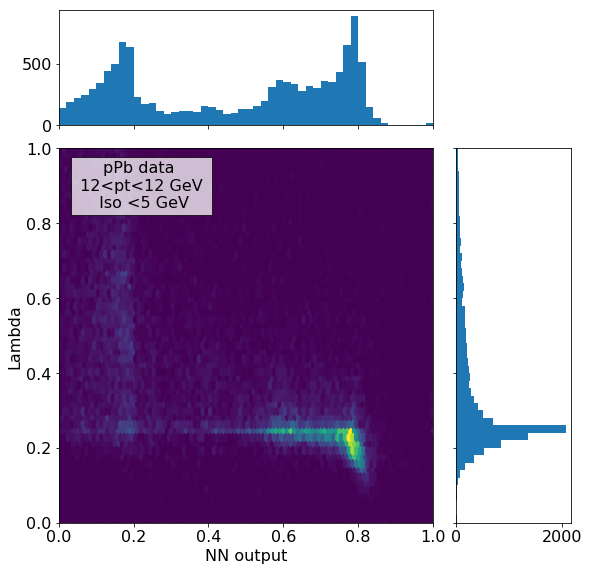

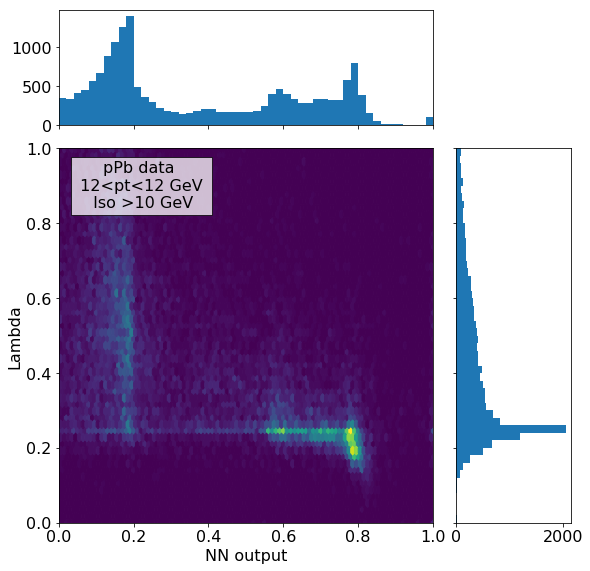

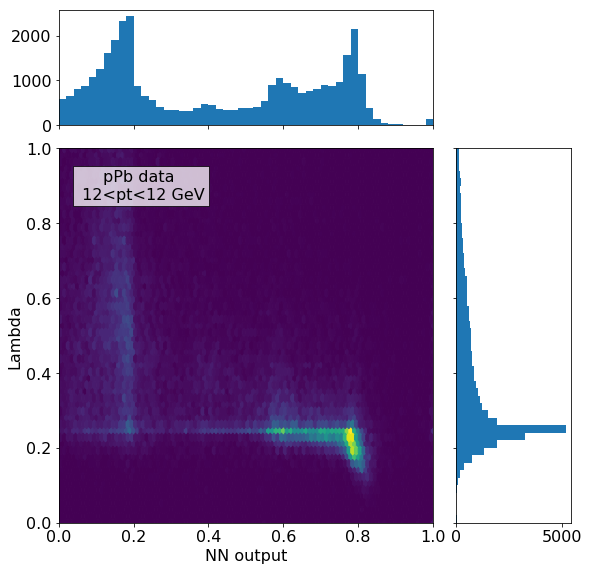

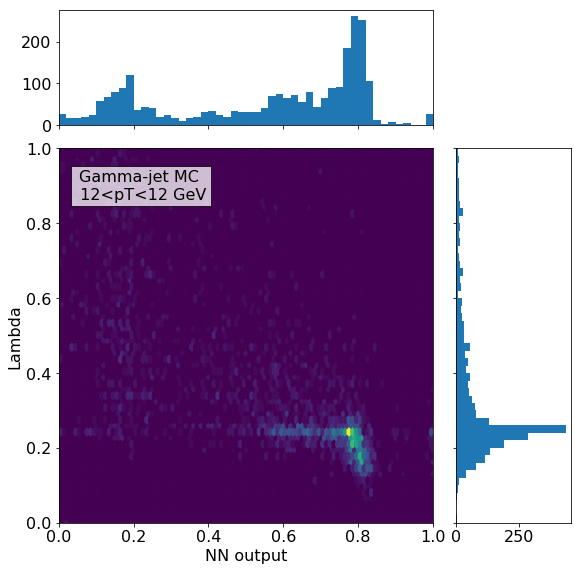

In [121]:
binedges = [12.0, 12.5]#,12.0,14.0,16.0]#,18.0,20.0,22.0,24.0,26.0,28.0]
#binedges = [16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,50.0]
#full, iso, noniso = cutptrange(dataHists, 8.0, 12.0)
#plotcorr(full,'pPb data \n 12 <pt < 14 GeV','all')

for ipt in range(len(binedges)-1):
    ptmin = binedges[ipt]
    ptmax = binedges[ipt+1]
    #full, iso, noniso = cutptrange(mcHists, ptmin, ptmax)
    #plotcorr(full,'Dijet MC \n %2.0f<pT<%2.0f GeV' %(ptmin,ptmax),'all_MC_%2.0f_%2.0f' %(ptmin,ptmax))
    full, iso, noniso = cutptrange(dataHists, ptmin, ptmax)
    hiso, bins, hiso_err, hiso_xerr = plotcorr(iso,'pPb data \n %2.0f<pt<%2.0f GeV \n Iso <5 GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))
    hnoniso, bins, hnoniso_err, hnoniso_xerr = plotcorr(noniso,'pPb data \n %2.0f<pt<%2.0f GeV \n Iso >10 GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))
    plotcorr(full,'pPb data \n %2.0f<pt<%2.0f GeV' %(ptmin,ptmax),'all_Data%2.0f_%2.0f' %(ptmin,ptmax))

    ##dealing with MC
    XX, fullMC, XY = cutptrange(mcHists, ptmin, ptmax)
    hMC, XX, XY, XZ = plotcorr(fullMC,'Gamma-jet MC \n %2.0f<pT<%2.0f GeV' %(ptmin,ptmax),'all_MC_%2.0f_%2.0f' %(ptmin,ptmax))
    
    
    

In [ ]:
#,hiso, ,hnoniso, hMC
import sys

y = hiso
yerr = np.sqrt(y)
bkg = hnoniso
signal = hMC

signalerr = np.divide(np.sqrt(signal), np.sum(signal))
signal = np.divide(signal, np.sum(signal)) 
bkgerr = np.divide(np.sqrt(bkg), np.sum(bkg))
bkg = np.divide(bkg, np.sum(bkg)) 



print y
print yerr
#print signal
#print bkg

def Chi2(S, B):
    
    model = B*bkg+S*signal
    chi2 = np.power( y -model ,2.0)
    sumchi2 = np.sum(chi2[:95]) 
    return sumchi2
    
init = np.sum(hiso)
print init
print 0.5*init

m = Minuit(Chi2, S=0.5*init, B=0.5*init, error_B=1, error_S=1)
m.migrad()
#m.print_matrix()
#m.draw_contour('S','B', bound=5, show_sigma=True);

#print m

signal = np.multiply(signal,m.values['S'])
signalerr = np.multiply(signalerr, m.values['S'])
bkg    = np.multiply(bkg,m.values['B'])
bkgerr = np.multiply(bkgerr, m.values['B'])

fig = plt.figure(3, figsize=(8, 8))
plt.bar(bins, signal, yerr=signalerr, width=bins[1]-bins[0], label='signal, MC',color='gold',ecolor='gold') 
plt.bar(bins, bkg, yerr=bkgerr, bottom=signal,  ecolor='darkblue', color='darkblue', width=bins[1]-bins[0],label='noniso, data') 
#plt.fill_between(bins, bkg-bkgerr+signal, bkg+bkgerr+signal,color='blue', alpha=0.35)
plt.errorbar(bins,y, yerr=yerr, label='isolated, data',fmt='o', mfc='white')

plt.legend()
plt.xlabel('NN output')
plt.ylabel('Entries')
plt.title(' %2.1f<pt<%2.1f GeV'%(ptmin,ptmax))
plt.show()


fig = plt.figure(4, figsize=(8, 8))
total = signal + bkg
ratio = np.divide(y-total,yerr)
plt.plot(bins, ratio,'o')
plt.show()
print 'chi2 ',np.sum(np.power(ratio,2.0))



    